In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Using 100000 entries for the dataset in CSV Format

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/yelp.csv')
df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

## Preprocessing Data

In [ ]:
df.drop(['business_id','date','review_id','type','user_id'],inplace = True,axis = 1)

In [ ]:
#Converting to lower case
df['clean_text'] = df['text'].apply(lambda x: x.lower())
df.head(5)

,stars,text,cool,useful,funny,clean_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate. rice is so good and i als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,"rosie, dakota, and i love chaparral dog park!!..."
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg!!!...


In [ ]:
#Replacing punctuations with space
import re
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df.head(5)

,stars,text,cool,useful,funny,clean_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...


In [ ]:
#Removal of special characters with space
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df.head(5)

,stars,text,cool,useful,funny,clean_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...


In [ ]:
#Replacing Numbers (integers) with space
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df.head(5)

,stars,text,cool,useful,funny,clean_text
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...


## Tokenization

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['review_token'] = df['clean_text'].apply(lambda x: word_tokenize(x))
df.head(5)

,stars,text,cool,useful,funny,clean_text,review_token
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...,"[my, wife, took, me, here, on, my, birthday, f..."
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...,"[i, have, no, idea, why, some, people, give, b..."
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...,"[love, the, gyro, plate, rice, is, so, good, a..."
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...,"[rosie, dakota, and, i, love, chaparral, dog, ..."
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...,"[general, manager, scott, petello, is, a, good..."


## StopWords Removal

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['review_token_filtered'] = df['review_token'].apply(lambda x: [word for word in x if not word in stop_words])
df.head(5)

,stars,text,cool,useful,funny,clean_text,review_token,review_token_filtered
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...,"[my, wife, took, me, here, on, my, birthday, f...","[wife, took, birthday, breakfast, excellent, w..."
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...,"[i, have, no, idea, why, some, people, give, b...","[idea, people, give, bad, reviews, place, goes..."
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...,"[love, the, gyro, plate, rice, is, so, good, a...","[love, gyro, plate, rice, good, also, dig, can..."
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...,"[rosie, dakota, and, i, love, chaparral, dog, ...","[rosie, dakota, love, chaparral, dog, park, co..."
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...,"[general, manager, scott, petello, is, a, good...","[general, manager, scott, petello, good, egg, ..."


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['review_lemmatized'] = df['review_token_filtered'].apply(lambda x: ' '.join([lemmatizer.lemmatize(i) for i in x]))
df.head(5)

,stars,text,cool,useful,funny,clean_text,review_token,review_token_filtered,review_lemmatized
0,5,My wife took me here on my birthday for breakf...,2,5,0,my wife took me here on my birthday for breakf...,"[my, wife, took, me, here, on, my, birthday, f...","[wife, took, birthday, breakfast, excellent, w...",wife took birthday breakfast excellent weather...
1,5,I have no idea why some people give bad review...,0,0,0,i have no idea why some people give bad review...,"[i, have, no, idea, why, some, people, give, b...","[idea, people, give, bad, reviews, place, goes...",idea people give bad review place go show plea...
2,4,love the gyro plate. Rice is so good and I als...,0,1,0,love the gyro plate rice is so good and i als...,"[love, the, gyro, plate, rice, is, so, good, a...","[love, gyro, plate, rice, good, also, dig, can...",love gyro plate rice good also dig candy selec...
3,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,rosie dakota and i love chaparral dog park ...,"[rosie, dakota, and, i, love, chaparral, dog, ...","[rosie, dakota, love, chaparral, dog, park, co...",rosie dakota love chaparral dog park convenien...
4,5,General Manager Scott Petello is a good egg!!!...,0,0,0,general manager scott petello is a good egg ...,"[general, manager, scott, petello, is, a, good...","[general, manager, scott, petello, good, egg, ...",general manager scott petello good egg go deta...


## Exploratory Data Analysis

In [ ]:
df.shape

(10000, 9)

In [ ]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
df.dtypes

stars                     int64
text                     object
cool                      int64
useful                    int64
funny                     int64
clean_text               object
review_token             object
review_token_filtered    object
review_lemmatized        object
dtype: object

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
px.histogram(df,x=df['stars'])

In [ ]:
df["Review Length"] = df["review_lemmatized"].apply(lambda n: len(n.split()))
df.head()
# Maximum Review Length(Words)
df['Review Length'].max()

500

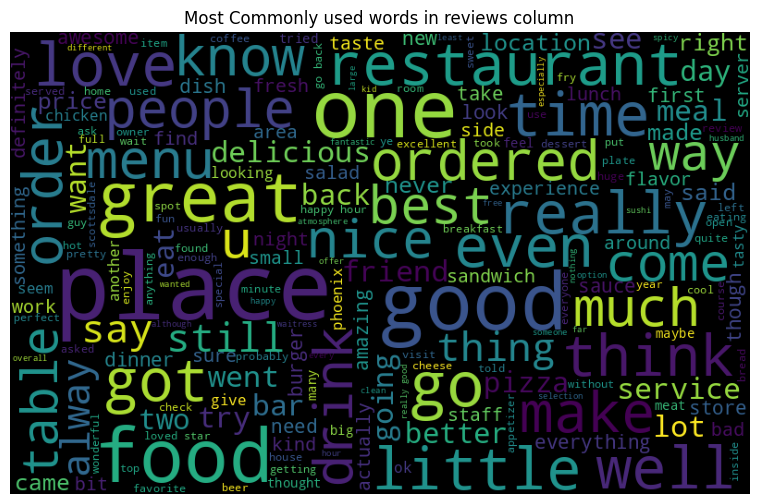

In [ ]:
all_words = ' '.join([text for text in df['review_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Commonly used words in reviews column")
plt.show()

## Splitting and Modelling

In [ ]:
X = df['text'].values
y = df['stars'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
print(X_train.shape,X_test.shape)

(8000,) (2000,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train

<8000x26369 sparse matrix of type '<class 'numpy.float64'>'
	with 661480 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred = mnb.fit(X_train, y_train)

In [ ]:
X_train_prediction = mnb.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

X_test_prediction = mnb.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [ ]:
print(f"Testing Data Accuracy: {testing_data_accuracy} \nTraining Data Accuracy: {training_data_accuracy}")

Testing Data Accuracy: 0.4235 
Training Data Accuracy: 0.51775


In [ ]:
X_data = X_test[150]
print(y_test[150])

prediction = mnb.predict(X_data)
print(prediction)

3
[4]


## Testing on custom data

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

def predict_scale(input_text):
    input_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([input_text])
    prediction = mnb.predict(input_vectorized)

    if prediction[0] == 1:
        return 'Negative'
    elif (prediction[0]==2 or prediction[0]==3):
        return 'Average'
    else:
      return 'Good'

In [ ]:
user_input = input("Enter a review: ")
result = predict_scale(user_input)
print("Prediction:", result)

Enter a review: very very bad product
Prediction: Good
